# Desenhos de Curvas a partir da Curvatura
**Autor:** Leonardo Dantas

Este trabalho explora o uso da computação simbólica e numérica no estudo da curvatura. Como decorrência do Teorema Fundamental da Teoria Local das Curvas Planas, curvas planas podem ser desenhadas puramente a partir de suas funções de curvatura, desconsiderando movimentos rígidos. Implementações em código permitem visualizar esse fascinante fenômeno. Toda a implementação deste trabalho foi feita em [SageMath](https://www.sagemath.org/) usando um caderno interativo Jupyter.

O trabalho é constituído de quatro partes:

* Introdução ao Ambiente SageMath
* Conceitos Teóricos Gerais
* Construção de Curvas a partir de Curvatura
* Exemplos de Curvas Construídas

A formatação desse caderno é retirada do curso [Practical Numerical Methods with Python](https://github.com/numerical-mooc/numerical-mooc), com código licenciado sob a MIT license (c) 2014 L.A. Barba, C. Cooper, G.F. Forsyth, A. Krishnan. Para carrega-lá, basta executar a célula seguinte.

In [1]:
# Carregar estilo do caderno
from IPython.core.display import HTML
from os import getcwd
css_file = f'{getcwd()}/styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())

## 1. Introdução ao Ambiente SageMath

Como o ambiente SageMath forma a base desse trabalho, consideraremos alguns conceitos básicos da plataforma. Como ponto de partida, iniciamos o ambiente de visualização em LaTeX e importamos funções customizadas úteis.

In [2]:
# Habilitar exibição de LaTeX
%display latex

# Funções úteis para o SageMath
from utils import vector_simplify, pretty_results, get_vector_arguments

Dessas funções, `vector_simplify` permite simplificar curvas paramétricas algebricamente, `pretty_results` exibe resultados formatados em LaTeX e `get_vector_arguments` encontra o parâmetro de uma curva paramétrica.

### Plotagem

Através do SageMath, é possível definir funções simbólicas, substituir valores nelas e plotar curvas paramétricas. Alguns exemplos são a lemniscata e a hélice.

#### Lemniscata

In [3]:
a = var('a')
lemniscata_generalizada(t) = ( (a*cos(t)) / (1 + sin(t)^2), (a*sin(t)*cos(t)) / (1 + sin(t)^2) )

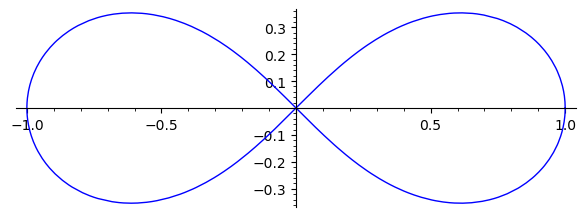

In [4]:
lemniscata_padrao = lemniscata_generalizada(t).subs(a==1)

parametric_plot(lemniscata_padrao, (t,0, 2*pi))

#### Hélice

In [5]:
a,b = var('a b')
helice_generalizada(t) = (a*cos(t),a*sin(t),b*t)

In [6]:
helice = helice_generalizada.subs([a==1,b==3])

parametric_plot3d(helice,(t,-2*pi, 2*pi), thickness=5)

Graphics3d Object

## 2. Conceitos Teóricos Gerais

Ferramentas como o SageMath permitem encontrar características importantes de curvas regulares como curvatura e torção. Nessa seção veremos como isso pode ser feito.

### Curvatura em $\mathbb{R}^2$

Em $\mathbb{R}^2$, o primeiro passo para encontrar a curvatura de uma curva é colocá-la em sua parametrização por comprimento de arco. Toda curva regular admite uma tal parametrização e para isso temos as seguintes funções.

In [7]:
def obter_comp_arco(curva):
    # Identificar parâmetro da curva
    x = get_vector_arguments(curva).pop()
    
    curva_x = curva.derivative(x)
    
    # Calcular comprimento de arco de 0 a t
    t = var("t")
    assume(t>0)
    s = integrate(norm(curva_x), (x,0,t))
    
    return s

In [8]:
def param_comp_arco(curva):
    # Obter comprimento de arco de 0 a t
    comp_arco = obter_comp_arco(curva)
    t = comp_arco.arguments()[0]
    
    # Encontrar t em termos de s
    s = var("s")
    param_comp_arco = solve(s == comp_arco,t)[0]
    
    # Substituir parâmetro original na curva 
    curva_subs = curva(t).subs(param_comp_arco)
    curva_subs = vector_simplify(curva_subs)
    
    # Redefinir argumento da função
    curva_param(s) = tuple(coord for coord in curva_subs)
    
    return curva_param

Com uma curva parametrizada por comprimento de arco, é possível então obter a curvatura da seguinte forma.

In [9]:
def obter_curvatura_R2(curva):
    # Identificar parâmetro da curva
    s = get_vector_arguments(curva).pop()
    
    curva_ss = curva.derivative(s, 2)
    
    curvatura = norm(curva_ss)(s)
    curvatura = curvatura.simplify_full()
    
    return curvatura 

#### Teste de Implementação

Verificamos que a implementação está correta através de um teste simples com um círculo em $\mathbb{R}^2$.

In [10]:
a,b = var('a b')
elipse_R2(t) = (a*cos(t), b*sin(t))

circ = elipse_R2.subs([a==5,b==5])
pretty_results((r"C(t)", circ), use_colon=True)

\begin{align*} C(t) :& \quad t \ {\mapsto}\ \left(5 \, \cos\left(t\right),\,5 \, \sin\left(t\right)\right) \\ \end{align*} \\

In [11]:
comp_circ = obter_comp_arco(circ)
pretty_results((r"\int_0^t || C'(x) || dx", comp_circ))

\begin{align*} \int_0^t || C'(x) || dx &= 5 \, t \\ \end{align*} \\

In [12]:
circ_comp_arco = param_comp_arco(circ)
pretty_results((r"C(s)", circ_comp_arco), use_colon=True)

\begin{align*} C(s) :& \quad s \ {\mapsto}\ \left(5 \, \cos\left(\frac{1}{5} \, s\right),\,5 \, \sin\left(\frac{1}{5} \, s\right)\right) \\ \end{align*} \\

In [13]:
circ_curv = obter_curvatura_R2(circ_comp_arco)
pretty_results((r"k_C(s)", circ_curv))

\begin{align*} k_C(s) &= \frac{1}{5} \\ \end{align*} \\

### Curvatura em $\mathbb{R}^3$

Em $\mathbb{R}^3$, a curvatura pode ser obtida através da fórmula geral independente de parametrização.

$$
k(t) = \frac{|| \alpha'(t) \times \alpha''(t) ||}{|| \alpha'(t) ||^3}
$$

O cálculo desta fórmula está implementando na seguinte função.

In [14]:
def obter_curvatura_R3(curva):
    # Computar Derivadas
    curva_t = curva.derivative(t)
    curva_tt = curva_t.derivative(t)
    
    # Aplicar Formula Geral de Curvatura 
    curvatura = norm( curva_t.cross_product(curva_tt) ) / norm(curva_t)^3
    curvatura = curvatura.simplify_full()
    
    return curvatura 

### Torção em $\mathbb{R}^3$

Como a curvatura, a torção pode ser obtida através de uma fórmula geral independente de parametrização.

$$
\tau(t) = \frac{ \langle (\alpha'(t) \times \alpha''(t)) , \alpha'''(t) \rangle }{ ||\alpha'(t) \times \alpha''(t)||^2 }
$$

In [15]:
def obter_torcao_R3(curva):
    # Computar Derivadas
    curva_t = curva.derivative(t)
    curva_tt = curva_t.derivative(t)
    curva_ttt = curva_tt.derivative(t)
    
    # Obter Produto Vetorial de Vetores Velocidade e Aceleração
    prod_veloc_acel = curva_t.cross_product(curva_tt)
    
    # Aplicar Fórmula Geral de Torção
    torcao = (prod_veloc_acel * curva_ttt) / norm(prod_veloc_acel)^2
    torcao = torcao.simplify_full()
    
    return torcao

#### Testes de Implementação

Verificamos a corretude da implementação com um exemplo simples: o círculo unitário em $\mathbb{R}^3$. Reconhecidamente, essa curva possui curvatura identicamente igual a $1$ e torção identicamente igual a $0$. Caso os resultados sejam diferentes, temos um erro de implementação.

In [16]:
# Construção do Círculo Unitário
elipse(t) = (a*cos(t),b*sin(t),1)
circ_unit = elipse.subs([a==1, b==1])

# Calculo de Curvatura e Torção em R3
curvatura_circ_unit = obter_curvatura_R3(circ_unit)
torcao_circ_unit = obter_torcao_R3(circ_unit)

# Teste de Sanidade com Círculo Unitário
assert curvatura_circ_unit == 1
assert torcao_circ_unit == 0

# Exibição de Resultados
pretty_results((r"k_{\text{circ}}",curvatura_circ_unit),
               (r"\tau_{\text{circ}}",torcao_circ_unit))

\begin{align*} k_{\text{circ}} &= 1 \\ \tau_{\text{circ}} &= 0 \\ \end{align*} \\

## 3. Construção de Curvas a partir de Curvatura

O Teorema Fundamental da Teoria Local de Curvas Planas nos diz que uma curva é unicamente determinada por sua função curvatura, desconsiderando movimentos rígidos. Há duas formas de reconstruir uma curva $\beta$ a partir de sua função curvatura $k_\beta(s)$. 

### Construção Simbólica

Usando computação simbólica, o procedimento é o seguinte.

1. Encontrar a função ângulo $\theta(s)$ da curva através da fórmula
$$
\theta(s) = \int k(s) ds + \theta_0
$$
onde $\theta_0$ é constante de integração.


2. Reconstruir $\beta(s)$ a partir da função ângulo com
$$
\beta(s) = \left( \int \cos\left( \theta(s) \right) ds + c, \int \sin \left( \theta(s) \right) ds + d \right)
$$
onde $c$ e $d$ são constantes de integração

No SageMath, implementamos da seguinte forma.

In [17]:
def construir_curva_simb(curvatura, teta_0=0,c=0,d=0):
    # Identificar Parâmetro da Curva
    s = curvatura.arguments()[0]
    
    # Construir Função Ângulo
    teta(s) = integrate(curvatura, s) + teta_0
    
    # Construir Curva a Partir de Função Ângulo
    curva_ang(s) = ( integrate( cos(teta(s)), s ), integrate( sin(teta(s)), s ) )
    curva_ang = vector_simplify(curva_ang)
    
    # Exportar função com n-tupla
    curva_construida = tuple(coord for coord in curva_ang)
    
    return curva_construida

#### Testes de Implementação

Um teste de implementação razoável é tentar reconstruir o círculo unitário. Reconhecidamente, esse curva possui curvatura identicamente igual a $1$. Portanto, se obtivermos algo diferente, há um erro na implementação. 

In [18]:
# Teste de Sanidade com Círculo Unitário
curvatura_circ_unit(s) = 1

circ_unit_simb(s) = construir_curva_simb(curvatura_circ_unit)

pretty_results((r"C(t)",circ_unit_simb), use_colon=True)

\begin{align*} C(t) :& \quad s \ {\mapsto}\ \left(\sin\left(s\right),\,-\cos\left(s\right)\right) \\ \end{align*} \\

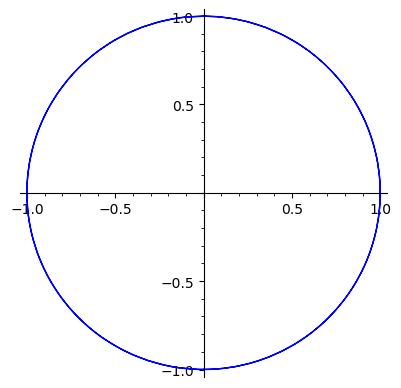

In [19]:
parametric_plot(circ_unit_simb, (s,-2*pi, 2*pi))

### Construção Numérica

Uma limitação da construção simbólica é a integrabilidade das funções envolvidas. Conforme veremos, em muitos casos não é possível obter uma solução exata para as integrais do primeiro método. Nesses casos, partimos para uma construção numérica. É possível obter a curva $\beta(s) = (x(s), y(s))$ resolvendo numericamente o seguinte sistema de equações diferenciais.

$$
\begin{align*}
    \theta'(s) &= k(s) \\
    x'(s) &= \cos(\theta(s)) \\
    y'(s) &= \sin(\theta(s))
\end{align*}
$$

A solução numérica nos fornece um conjunto de pontos que então podem ser plotados. Em SageMath, temos a seguinte implementação.

In [20]:
def construir_curva_num(curvatura, r_inicial=-50, r_final=50, 
                        vars_iniciais=[0,0,0], tam_passo=0.01):
    # Montar Expressão de Curvatura
    r = var('r')
    kappa(r) = curvatura(s).subs(s==r)

    # Resolver Sistema de EDOs via Runge-Kutta
    teta, x,y = var('teta x y')
    sis_trig = [kappa(r),cos(teta), sin(teta)]
    condIniciais =[r_inicial, \
                   vars_iniciais[0], \
                   vars_iniciais[1],\
                   vars_iniciais[2]]
    solucoes_sis = desolve_system_rk4(sis_trig, [teta, x, y], \
                                      ics=condIniciais, ivar=r, \
                                      step=tam_passo, end_points=r_final
                                     )
    
    # Isolar pontos (x,y). Soluções vêm no formato (r, teta, x, y)
    pontos = [[k,m] for i,j,k,m in solucoes_sis]
    
    # Visualização
    plt = list_plot(pontos, plotjoined=true, aspect_ratio=1)
    plt.show()

#### Teste de Implementação

A abordagem numérica não nos fornece uma forma fechada para a curva. No entanto, podemos visualizá-la através dos pontos produzidos. Nesse sentido, um teste razoável de implementação é o mesmo círculo testado na abordagem simbólica.

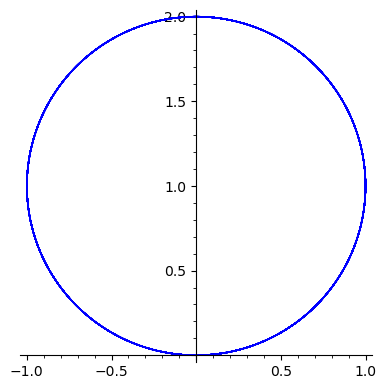

In [21]:
curvatura_circ_unit(s) = 1
construir_curva_num(curvatura_circ_unit)

Observe que embora o círculo esteja deslocado e não esteja perfeitamente redondo, é aproximadamente o mesmo círculo obtido com a abordagem simbólica. Usaremos essa estratégia quando a integração simbólica não for possível.

## 4. Exemplos de Curvas Geradas

Nessa seção, veremos exemplos de diversas curvas interessantes desenhadas a partir de suas curvaturas.

#### Catenária

As catenárias constituem uma classe de curvas conhecida. A curvatura delas é dada por

$$
k_{\text{catenária}}(s) = -\frac{a^2}{a^2 + s^2}
$$

Instaciaremos a fórmula geral da curvatura da catenária no SageMath. Em seguida, montaremos uma catenária padrão $\beta$(s) representando o caso particular quando $a=1$.

In [22]:
a = var('a')
curv_catenaria_generalizada(s) = a / (a^2 + s^2)

curv_catenaria = curv_catenaria_generalizada.subs(a==1)

Com isso, é possível possível reconstruir a curva catenária padrão.

In [23]:
catenaria(s) = construir_curva_simb(curv_catenaria)
pretty_results((r"\beta(s)", catenaria), use_colon=True)

\begin{align*} \beta(s) :& \quad s \ {\mapsto}\ \left(\operatorname{arsinh}\left(s\right),\,\sqrt{s^{2} + 1}\right) \\ \end{align*} \\

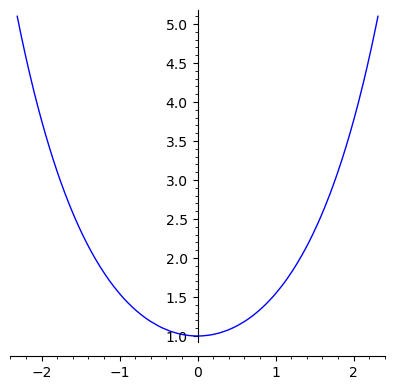

In [24]:
parametric_plot(catenaria,(s,-5, 5), thickness=1)

#### Espiral Logarítimica

Já a curvatura da espiral logarítmica é dada por

$$
k_{\text{espiral}}(s) = \frac{1}{bs}
$$

Como anteriormente, instanciamos a versão generalizada da curvatura e depois implementamos o caso específico $\gamma(s)$ quando $b=\frac{1}{3}$. 

In [25]:
b = var('b')
curv_espiral_log_gen(s) = 1/(b*s)

curv_espiral_log = curv_espiral_log_gen.subs([b==1/3])

In [26]:
espiral_log(s) = construir_curva_simb(curv_espiral_log)
pretty_results((r"\gamma(s)", espiral_log), use_colon=True)

\begin{align*} \gamma(s) :& \quad s \ {\mapsto}\ \left(\frac{2}{5} \, s \cos\left(\log\left(s\right)\right)^{3} - \frac{3}{10} \, s \cos\left(\log\left(s\right)\right) + \frac{3}{10} \, {\left(4 \, s \cos\left(\log\left(s\right)\right)^{2} - s\right)} \sin\left(\log\left(s\right)\right),\,-\frac{6}{5} \, s \cos\left(\log\left(s\right)\right)^{3} + \frac{9}{10} \, s \cos\left(\log\left(s\right)\right) + \frac{1}{10} \, {\left(4 \, s \cos\left(\log\left(s\right)\right)^{2} - s\right)} \sin\left(\log\left(s\right)\right)\right) \\ \end{align*} \\

Note como a expressão é um tanto mais complexa do que a da catenária.

verbose 0 (3835: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 100 points.
verbose 0 (3835: plot.py, generate_plot_points) Last error message: 'Unable to compute f(-0.09312266595683547)'


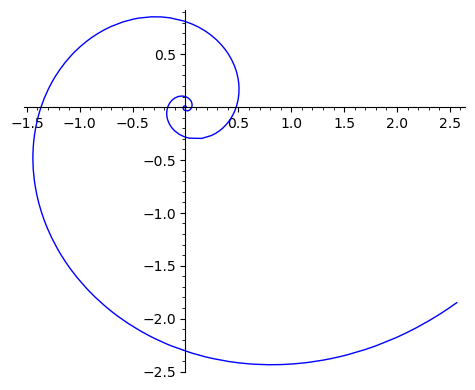

In [27]:
parametric_plot(espiral_log,(s,-10, 10), thickness=1)

Apesar do sucesso na plotagem da curva, a abordagem simbólica começa a demonstrar problemas.

#### Espiral de Euler

A espiral de Euler representa um curva particularmente interessante. Observe que é possível computá-la simbólicamente.

In [28]:
a, n = var('a n')
curv_euler_generalizada(s) = - s^n / a^(n+1)

curv_euler = curv_euler_generalizada.subs([a==1,n==1])

In [29]:
espiral_euler = construir_curva_simb(curv_euler)
pretty_results((r"\delta(s)", espiral_euler), use_colon=True)

\begin{align*} \delta(s) :& \quad \left(-\frac{1}{4} \, \sqrt{\pi} {\left(\left(i - 1\right) \, \operatorname{erf}\left(\sqrt{\frac{1}{2} i} s\right) - \left(i + 1\right) \, \operatorname{erf}\left(\sqrt{-\frac{1}{2} i} s\right)\right)}, -\frac{1}{4} \, \sqrt{\pi} {\left(\left(i + 1\right) \, \operatorname{erf}\left(\sqrt{\frac{1}{2} i} s\right) - \left(i - 1\right) \, \operatorname{erf}\left(\sqrt{-\frac{1}{2} i} s\right)\right)}\right) \\ \end{align*} \\

No entanto, não é possível desenhá-la a partir da expressão obtida. A célula de código a seguir produz um erro.

In [30]:
parametric_plot(espiral_euler, (s, 1, 2), thickness=2)

TypeError: unable to coerce to a real number

Portanto, partimos para a construção numérica. 

In [ ]:
construir_curva_num(curv_euler)

Como é possível observar, a abordagem numérica nos permite visualizar curvas com construção simbólica complicada. Deste ponto em diante, todas as curvas serão construídas numericamente. 

#### Curvaturas com Funções Trigonométricas

Quando a curvatura inclui funções trigonométricas, as curvas assumem formatos curiosos.

##### Curva $\epsilon$

In [ ]:
curv_epsilon(s) = cos(s)
pretty_results((r"\epsilon(s)", curv_epsilon), use_colon=True) 

In [ ]:
construir_curva_num(curv_epsilon,vars_iniciais=[pi/2,0,0],
                    r_inicial=-10, r_final=10)

##### Curva $\zeta$

In [ ]:
curv_zeta(s) = s*sin(s)
pretty_results((r"\zeta(s)", curv_zeta), use_colon=True)

In [ ]:
construir_curva_num(curv_zeta, vars_iniciais=[23*pi/16,0,0])

##### Curva $\eta$

In [ ]:
curv_eta(s) = 2.4*sin(s)
pretty_results((r"\eta(s)", curv_eta), use_colon=True)

In [ ]:
construir_curva_num(curv_eta,vars_iniciais=[pi/4,0,0])

##### Curva $\iota$

In [ ]:
curv_iota(s) = sin(s)*s^2
pretty_results((r"\iota(s)", curv_iota), use_colon=True)

In [ ]:
construir_curva_num(curv_iota,vars_iniciais=[pi/4,0,0], 
                    r_inicial=-10, r_final=10)

##### Curva $\lambda$

In [ ]:
curv_lambda(s) = -(2/3)*abs(csc(2*s))
pretty_results((r"\lambda(s)", curv_lambda), use_colon=True) 

In [ ]:
construir_curva_num(curv_lambda,vars_iniciais=[0,0,0], tam_passo=0.01,
                    r_inicial=0.1, r_final=19)

##### Curva $\nu$

In [ ]:
curv_nu(t) = t*tan(t)
pretty_results((r"\nu(t)", curv_nu), use_colon=True) 

In [ ]:
construir_curva_num(curv_nu,vars_iniciais=[0,0,0], tam_passo=0.01,
                    r_inicial=0.1, r_final=19)

##### Curva $\xi$

In [ ]:
curv_xi(t) = arcsin(t)
pretty_results((r"\xi(t)", curv_xi), use_colon=True) 

In [ ]:
construir_curva_num(curv_xi,vars_iniciais=[0,0,0], tam_passo=0.01,
                    r_inicial=0.1, r_final=7)

#### Curvaturas com Outras Funções

Além de funções trigonométricas, até mesmo funções especiais como a função gama podem ser usadas para a curvatura. A curva a seguir exemplifica essa utilização.

In [ ]:
assume(2*s+1>0)

curv_mu(s) = integrate(t^(s-1/2) * e^(-t), t,0, infinity)
pretty_results((r"\lambda(s)", curv_mu), use_colon=True)

In [ ]:
construir_curva_num(curv_mu,r_inicial=1, r_final=5, 
                    vars_iniciais=[pi/2,0,0])

## Conclusão

Ao fim desse trabalho, constatamos como a computação simbólica e numérica é uma poderosa ferramenta para visualizações em geometria diferencial. Apesar de eventuais desafios, como a integrabilidade de funções, pacotes como o SageMath fornecem recursos que facilitam o estudo de curvas e suas características. Tais capacidades fortalecem a intuição por trás desses conceitos e permitem uma melhor compreensão desses objetos matemáticos.

## Referências

1. OPREA, John. **Differential Geometry and Its Applications**. 2. ed. Washington, Dc: Mathematical Association Of America, 2007. 469 p.

2. GRAY, Alfred; ABBENA, Elsa; SALAMON, Simon. **Modern Differential Geometry of Curves and Surfaces with Mathematica**. 3. ed. Boca Raton: Chapman And Hall/Crc, 2006. 974 p.